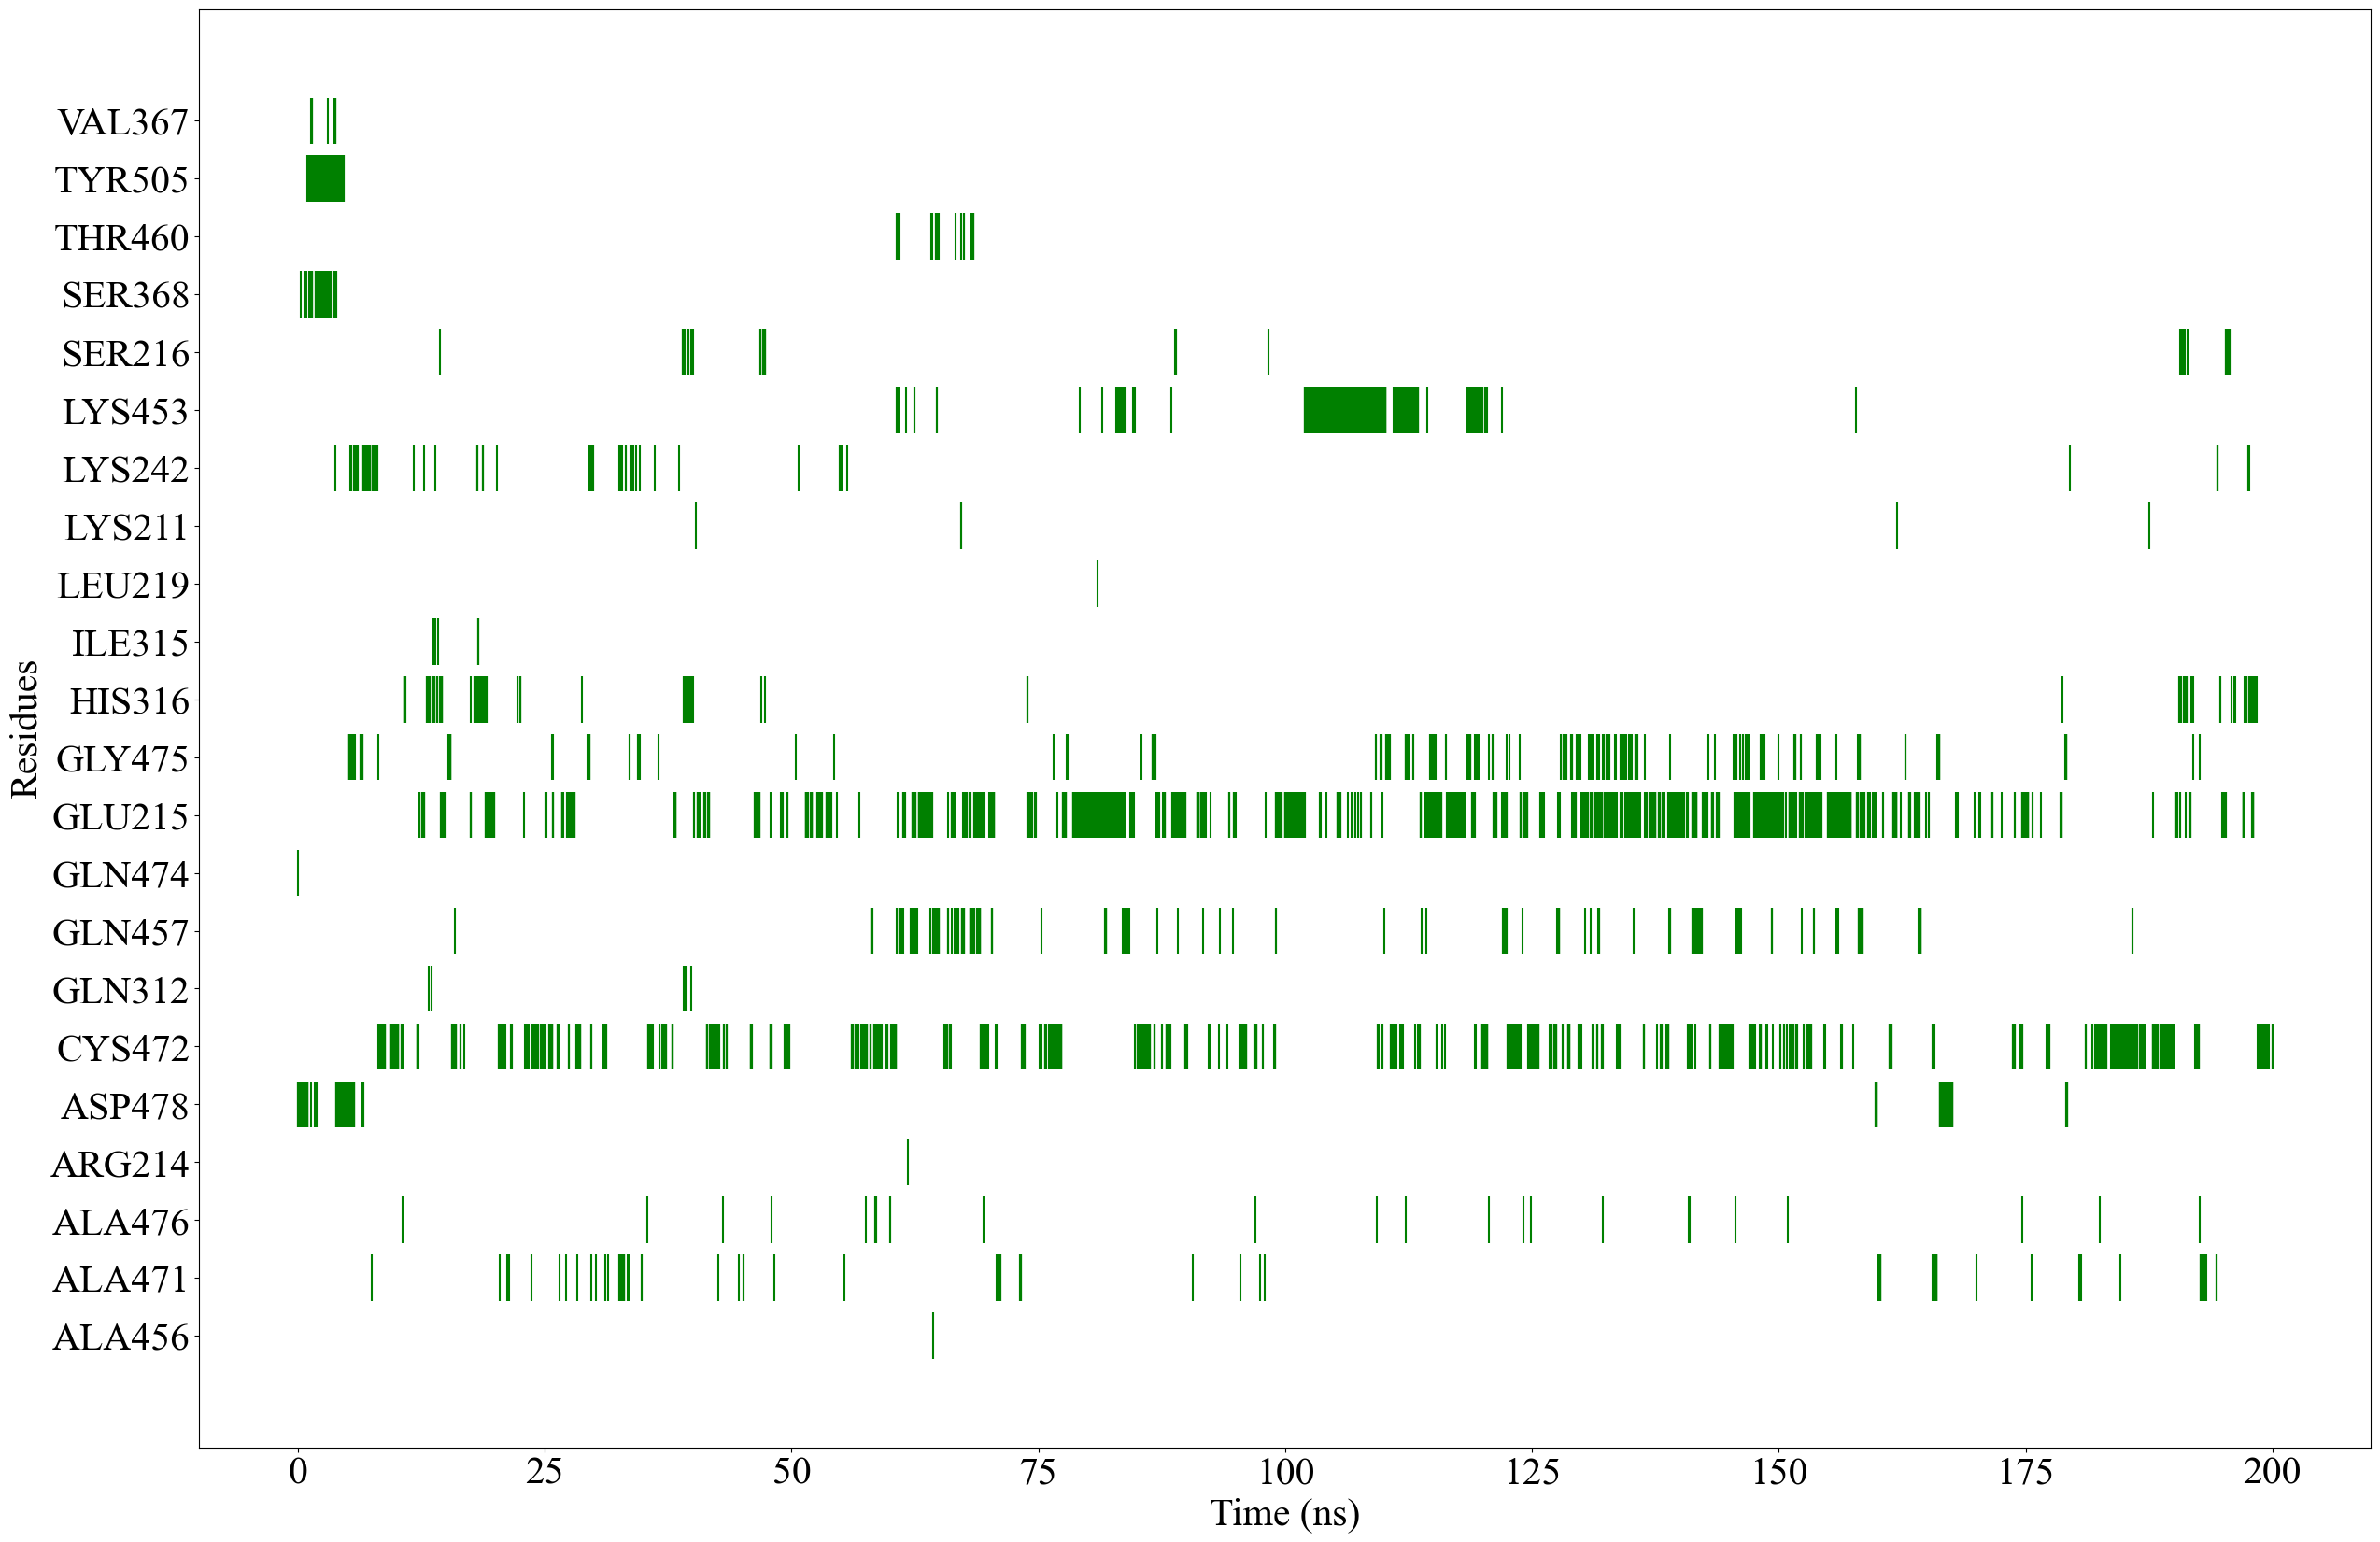

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def generate_matrix(df,color):
    data = []
    for i, row in df.iterrows():
        sublist = []
        row = row.to_dict()
        row = { k:v for k,v in row.items() if v >0}
        if len(row) > 0:
            item ,_ =  row.popitem()
            sublist.append(item)
            sublist.append(i)
            sublist.append(color)

            data.append(sublist)


    op = pd.DataFrame(data, columns=['gene','time','color'])
    return op
    
# df0 = pd.read_excel(r"Pinores_7yim.xlsx" , index_col='Time (ns)',sheet_name=1)
# df1 = pd.read_excel(r"syrin_7yim.xlsx" , index_col='Time (ns)',sheet_name=1)
df2 = pd.read_excel(r"monoli_7yim.xlsx" , index_col='Time (ns)',sheet_name=1)


# df0 = generate_matrix(df0,'red')
# df1 = generate_matrix(df1,'black')
df2 = generate_matrix(df2,'green')

main_df = pd.concat([df2])

# ,df1,df2

main_df = main_df.groupby('gene').agg(pd.Series.tolist)

main_df.reset_index(inplace=True)

offsets = list(main_df.index)
plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.size': 30})

main_df['gene_numerical'] = pd.factorize(main_df['gene'])[0]
plt.figure(figsize=((30,20)))
plt.eventplot(main_df['time'], linelengths=0.8, colors=main_df['color'])
plt.yticks(main_df['gene_numerical'], main_df['gene'])
plt.xlabel('Time (ns)')
plt.ylabel('Residues')

legend_patches = [Patch(facecolor='green', label='AFP-1-Monolinolenin complex',edgecolor='green')]

 # Patch(facecolor='red', label='AFP-(-)Pinoresinol complex',edgecolor='red'), Patch(facecolor='black', label='AFP-(-)Syringaresinol complex',edgecolor='black')

# plt.legend(handles=legend_patches,bbox_to_anchor=(1.05,1), loc='upper left')
# plt.subplots_adjust(right=0.7)
plt.savefig('D:/Abel/AFP_caspase/FIgure_generation/FIgure_generation/Hbond/Hbond_mono.png', dpi=300)
plt.show()

